# CS 180 Project: Predictive model of household income using clustering
-----------------------------------------------------------------------------------------------------------------------------------------------

<a href="https://colab.research.google.com/github/rudnam/cs180-project/blob/main/Predictive_model_of_household_income_using_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Members:
- Francis Albarracin (WFW)
- Harold Antonio (WFY)

Web app link: https://cs180-project.onrender.com/

Github repository link: https://github.com/rudnam/cs180-project

# Loading Dataset

First of all, the dataset is read through a copy of the dataset csv hosted on Github.

In [ ]:
import pandas as pd

dataset_url = 'https://raw.githubusercontent.com/rudnam/CS-180-Project/main/Family%20Income%20and%20Expenditure.csv'
df_orig = pd.read_csv(dataset_url)

df_orig.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [ ]:
df_orig.shape

(41544, 60)

In [ ]:
df_orig.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,...,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,...,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,...,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.911385e+05,105635.500000,1.000000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,1.181599e+07,827565.000000,2.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,3.000000,3.000000,5.000000


# Preprocessing

## Dropping certain columns

Some columns are too complicated and must be dropped.

In [ ]:
for col in df_orig.columns:
  sum_of_null_values = df_orig[col].isnull().sum()
  if sum_of_null_values != 0:
    print(f'{col} has {sum_of_null_values} null values.')

Household Head Occupation has 7536 null values.
Household Head Class of Worker has 7536 null values.


In [ ]:
df_orig['Household Head Highest Grade Completed'].unique()

array(['Teacher Training and Education Sciences Programs',
       'Transport Services Programs', 'Grade 3', 'Elementary Graduate',
       'Second Year High School', 'Third Year High School',
       'Business and Administration Programs', 'First Year College',
       'High School Graduate',
       'Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree',
       'Humanities Programs', 'First Year High School', 'Grade 6',
       'Grade 4', 'Engineering and Engineering Trades Programs',
       'Grade 2', 'Grade 5', 'Social and Behavioral Science Programs',
       'Agriculture, Forestry, and Fishery Programs', 'Health Programs',
       'Fourth Year College',
       'Engineering and Engineering trades Programs',
       'Second Year College', 'Third Year College', 'Grade 1',
       'No Grade Completed', 'Security Services Programs',
       'Basic Programs', 'First Year Post Secondary',
      

In [ ]:
df_orig['Household Head Occupation'].unique()

array(['General elementary education teaching professionals',
       'Transport conductors', 'Farmhands and laborers', 'Rice farmers',
       'General managers/managing proprietors in transportation, storage and communications',
       'Heavy truck and lorry drivers', nan, 'Hog raising farmers',
       'Vegetable farmers',
       'General managers/managing proprietors in wholesale and retail trade',
       'Stocks clerks', 'Justices', 'Other social science professionals',
       'Protective services workers n. e. c.', 'Secretaries',
       'Electronics mechanics and servicers',
       'Foresters and related scientists',
       'Shop salespersons and demonstrators',
       'College, university and higher education teaching professionals',
       'General managers/managing proprietors of restaurants and hotels',
       'Welders and flamecutters', 'Car, taxi and van drivers',
       'Motor vehicle mechanics and related trades workers',
       'Traditional chiefs and heads of villages', 'M

As we can see, these columns might require NLP for best analysis. However, the team opted to drop them for less work.

In [ ]:
df_income = df_orig.drop(columns = ['Household Head Highest Grade Completed', 'Household Head Occupation'])

## Cleaning the formatting

In order to make the formatting more consistent, the names of the columns are turned into lowercase and formatted more uniformly using the helper function `underscore_formatter`.

In [ ]:
def underscore_formatter(words):
  import string
  for punct in string.punctuation:
    words=words.replace(punct, " ")
  spaces = [' '*i for i in range(10,1,-1)]
  words = words.lower().strip()
  for space in spaces:
    words=words.replace(space, ' ')
  return '_'.join(words.split(' '))

df_income.columns = [underscore_formatter(col) for col in df_income.columns]

The categorical and numerical features are also identified to make the succeeding preprocessing steps easier.

In [ ]:
cat_features = [
    'region',
    'main_source_of_income',
    'household_head_sex',
    'household_head_marital_status',
    'household_head_job_or_business_indicator',
    'household_head_class_of_worker',
    'type_of_household',
    'type_of_building_house',
    'type_of_roof',
    'type_of_walls',
    'tenure_status',
    'toilet_facilities',
    'main_source_of_water_supply',
]

num_features = [col for col in df_income.columns if col not in cat_features]

## Target encoding

Now we can apply One-hot encoding on the categorical features but there is one problem.

Among the categorical features, `region` in particular had a high number of categories. This can be a problem as the `region` feature might influence the model too much when transformed to a large number of binary features.

In [ ]:
print(df_income['region'].unique())
print('Number of categories:',len(df_income['region'].unique()))

['CAR' 'Caraga' 'VI - Western Visayas' 'V - Bicol Region' ' ARMM'
 'III - Central Luzon' 'II - Cagayan Valley' 'IVA - CALABARZON'
 'VII - Central Visayas' 'X - Northern Mindanao' 'XI - Davao Region'
 'VIII - Eastern Visayas' 'I - Ilocos Region' 'NCR' 'IVB - MIMAROPA'
 'XII - SOCCSKSARGEN' 'IX - Zasmboanga Peninsula']
Number of categories: 17


Due to this, instead of one-hot encoding, we decided to use Target encoding for the `region` feature. Target encoding is the process of replacing a categorical value with the mean of the target variable. In this situation the target variable is `total_household_income` as stated in our title.

In [ ]:
# Remove region since it will not be included in one-hot encoding
cat_features.remove('region')

Now we can apply Target encoding. `TargetEncoder` from the `category_encoders` library is used for target encoding. The Target encoded dataframe is stored in `df_target_encoded` for the time being.

In [ ]:
# Columns to target encode
to_target_encode = ['region']

!pip install -q category_encoders
from category_encoders import TargetEncoder

# Target encoding on 'region' feature, with target as 'total_household_income'
target_encoder = TargetEncoder()
df_target_encoded = pd.DataFrame(target_encoder.fit_transform(df_income[to_target_encode], df_income['total_household_income']))

## One-hot encoding

Now we apply One-hot encoding on the categorical features using `OneHotEncoder` from the `sklearn.preprocessing` library.

The One-hot encoded dataframe is stored in `df_onehot_encoded` for the time being. Its columns are then put through the `underscore_formatter` to keep the formatting of dataframes consistent.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding on categorical features
onehot_encoder = OneHotEncoder(sparse_output=False)
df_onehot_encoded = pd.DataFrame(onehot_encoder.fit_transform(df_income[cat_features]))
df_onehot_encoded.columns = [underscore_formatter(col) for col in onehot_encoder.get_feature_names_out(cat_features)]

## Standardization

Now we can standardize the numerical features.

Note that since target encoding transformed `region` to a numerical feature as well, it is included in the standardization. Standardization is done using `StandardScaler` from the `sklearn.preprocessing` library.

The Standardized dataframe is stored in `df_standardized` for the time being. The columns are also put through the `underscore_formatter` and appended with `_final` to differentiate it from the original columns.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the numerical features and target encoded feature
scaler = StandardScaler()
df_standardized = pd.concat([df_income[num_features], df_target_encoded], axis=1)
df_standardized = pd.DataFrame(scaler.fit_transform(df_standardized))
df_standardized.columns = [underscore_formatter(col) + '_final' for col in num_features + df_target_encoded.columns.tolist()]

We can now combine the original dataframe, the standardized dataframe, and the one-hot encoded dataframe.

The combined dataframe is named `df_final` and the preprocessed columns are stored in `cols_final` for easier access.

In [ ]:
# Concatenate original dataframe, standardized dataframe, and the one-hot encoded dataframe
df_final = pd.concat([df_income, df_standardized, df_onehot_encoded], axis=1)
cols_final = [col for col in df_final.columns if col in df_standardized or col in df_onehot_encoded]

## Principal component analysis

And for the last preprocessing step, Principal component analysis is done to reduce the dimensionality of the dataset. The value of `n_components` used is `0.95` which means the variance explained is 95%. For this we used `PCA` from the `sklearn.decomposition` library.

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95, random_state=0)
df_pca = pd.DataFrame(pca.fit_transform(df_final[cols_final]))
df_pca.columns = [f'PCA{col}' for col in df_pca.columns]
df_final = pd.concat([df_final, df_pca], axis=1)
cols_final_pca = [col for col in df_pca.columns]

print(f'PCA reduced columns from {len(df_final[cols_final].columns)} to {len(df_final[cols_final_pca].columns)}.')


PCA reduced columns from 116 to 49.


The PCA'ed columns are concatenated to the `df_final` dataframe and the names of the columns `PCA0, PCA1, PCA2, ...` are stored in the `cols_final_pca` variable for easier access later.

## Sidenote: Hesitations
Regarding feature selection and outliers.
The team tried to limit the features into numerical only, categorical only, with outlier or without outlier. With how nice the clusters look as the standard, this is the best path to take.

# Clustering

Now, we can apply Kmeans to the PCA reduced dataset.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Find optimal number of clusters

# Dict for storing the models, clusters
models = {}
clusters = {}

# List for storing the inertia (for plotting)
inertia = []

# For loop through each k value
for k in range(1,31):
    kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++', n_init='auto')
    clusters[k] = kmeans.fit_predict(df_final[cols_final_pca])
    models[k] = kmeans
    inertia.append(kmeans.inertia_)

The graph below does not scream any kind of elbow.

In [ ]:
# Plot K values against the inertia
import plotly.express as px

k_values = range(1,31)
df_inertia = pd.DataFrame({'Number of Clusters': k_values, 'Inertia': inertia})

fig = px.line(df_inertia, x="Number of Clusters", y="Inertia", title='Kmeans Inertia over Number of Clusters', markers=True)
fig.update_layout(autosize=False,width=600,height=600,)
fig.show()

Silhouette scores can hint at a good k.

In [ ]:
from sklearn import metrics
silhouette_scores = []
for i in range(2, 31):
  silhouette_scores.append(metrics.silhouette_score(df_final[cols_final_pca], models[i].labels_))

df_silhouette = pd.DataFrame({'Number of Clusters': k_values[1:], 'Silhouette Score': silhouette_scores})
fig = px.line(df_silhouette, x="Number of Clusters", y="Silhouette Score", title='Kmeans Silhouette Scores over Number of Clusters', markers=True)
fig.update_layout(autosize=False,width=600,height=600,)
fig.show()

In [ ]:
# Chosen k here
optimal_k = 7

# Results

Let's view the tSNE visualization of the Kmeans clusters.

In [ ]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne = tsne.fit_transform(df_final[cols_final_pca])

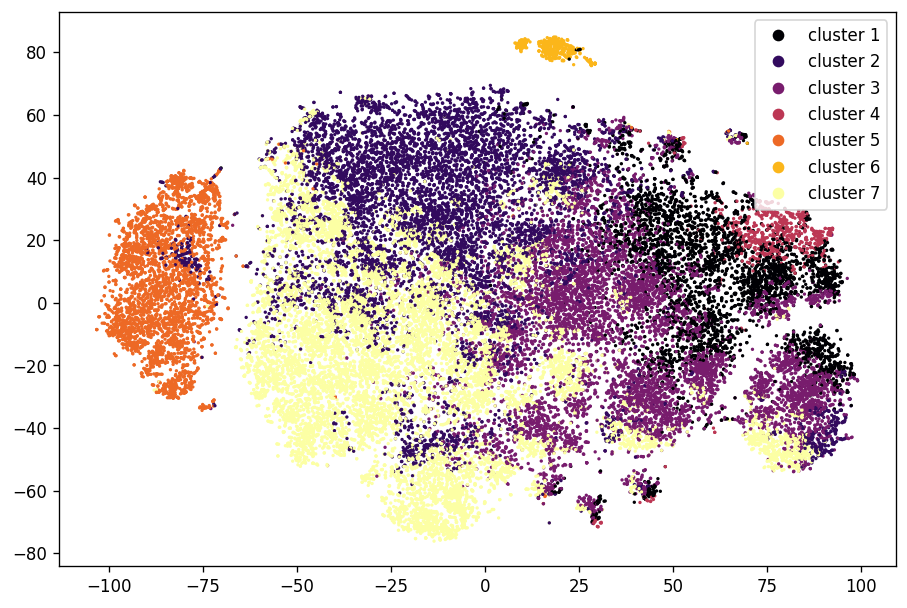

In [ ]:
plt.figure(figsize=(9,6), dpi=120)
plot = plt.scatter(tsne[:,0], tsne[:,1], c=models[optimal_k].labels_, cmap='inferno', s=1)
plt.legend(handles=plot.legend_elements()[0], labels=[f'cluster {i+1}' for i in range(optimal_k)])
plt.show()

Choose which cluster to visualize below. cluster_labels starts with 1.

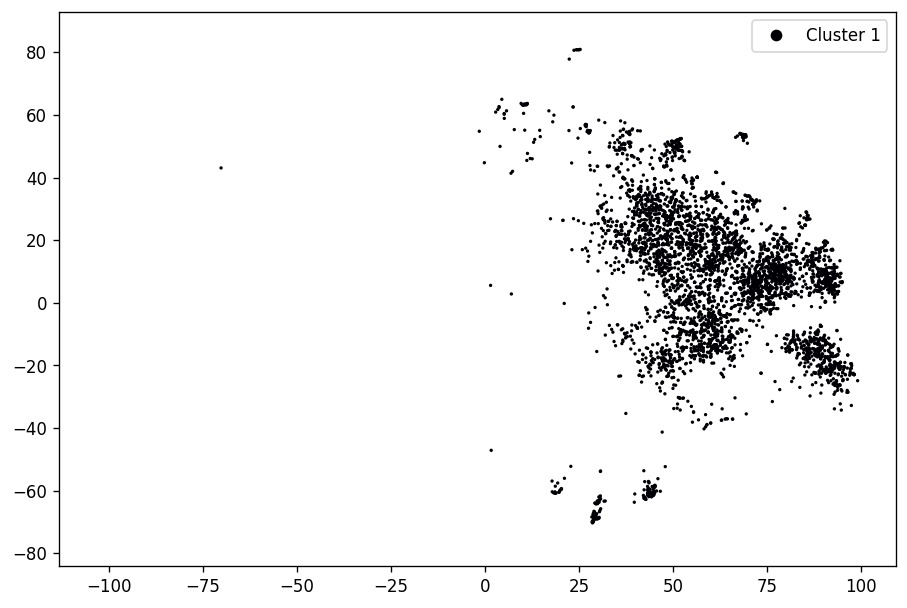

In [ ]:
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def cluster_visualizer(optimal_k, cluster_i):
  listedcolormap = mpl.colormaps['inferno'].resampled(optimal_k)
  chosen_color = listedcolormap.colors[cluster_i-1]
  listedcolormap.colors = [np.array([1,1,1,0])]*(cluster_i-1)+[chosen_color]+[np.array([1,1,1,0])]*(optimal_k-cluster_i)

  plt.figure(figsize=(9,6), dpi=120)
  plot = plt.scatter(tsne[:,0], tsne[:,1], c=models[optimal_k].labels_, cmap=listedcolormap, s=1)
  plt.legend(handles=plot.legend_elements()[0], labels=[f'Cluster {cluster_i}'])
  plt.show()

cluster_visualizer(optimal_k, 1)

## Silhouette Score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


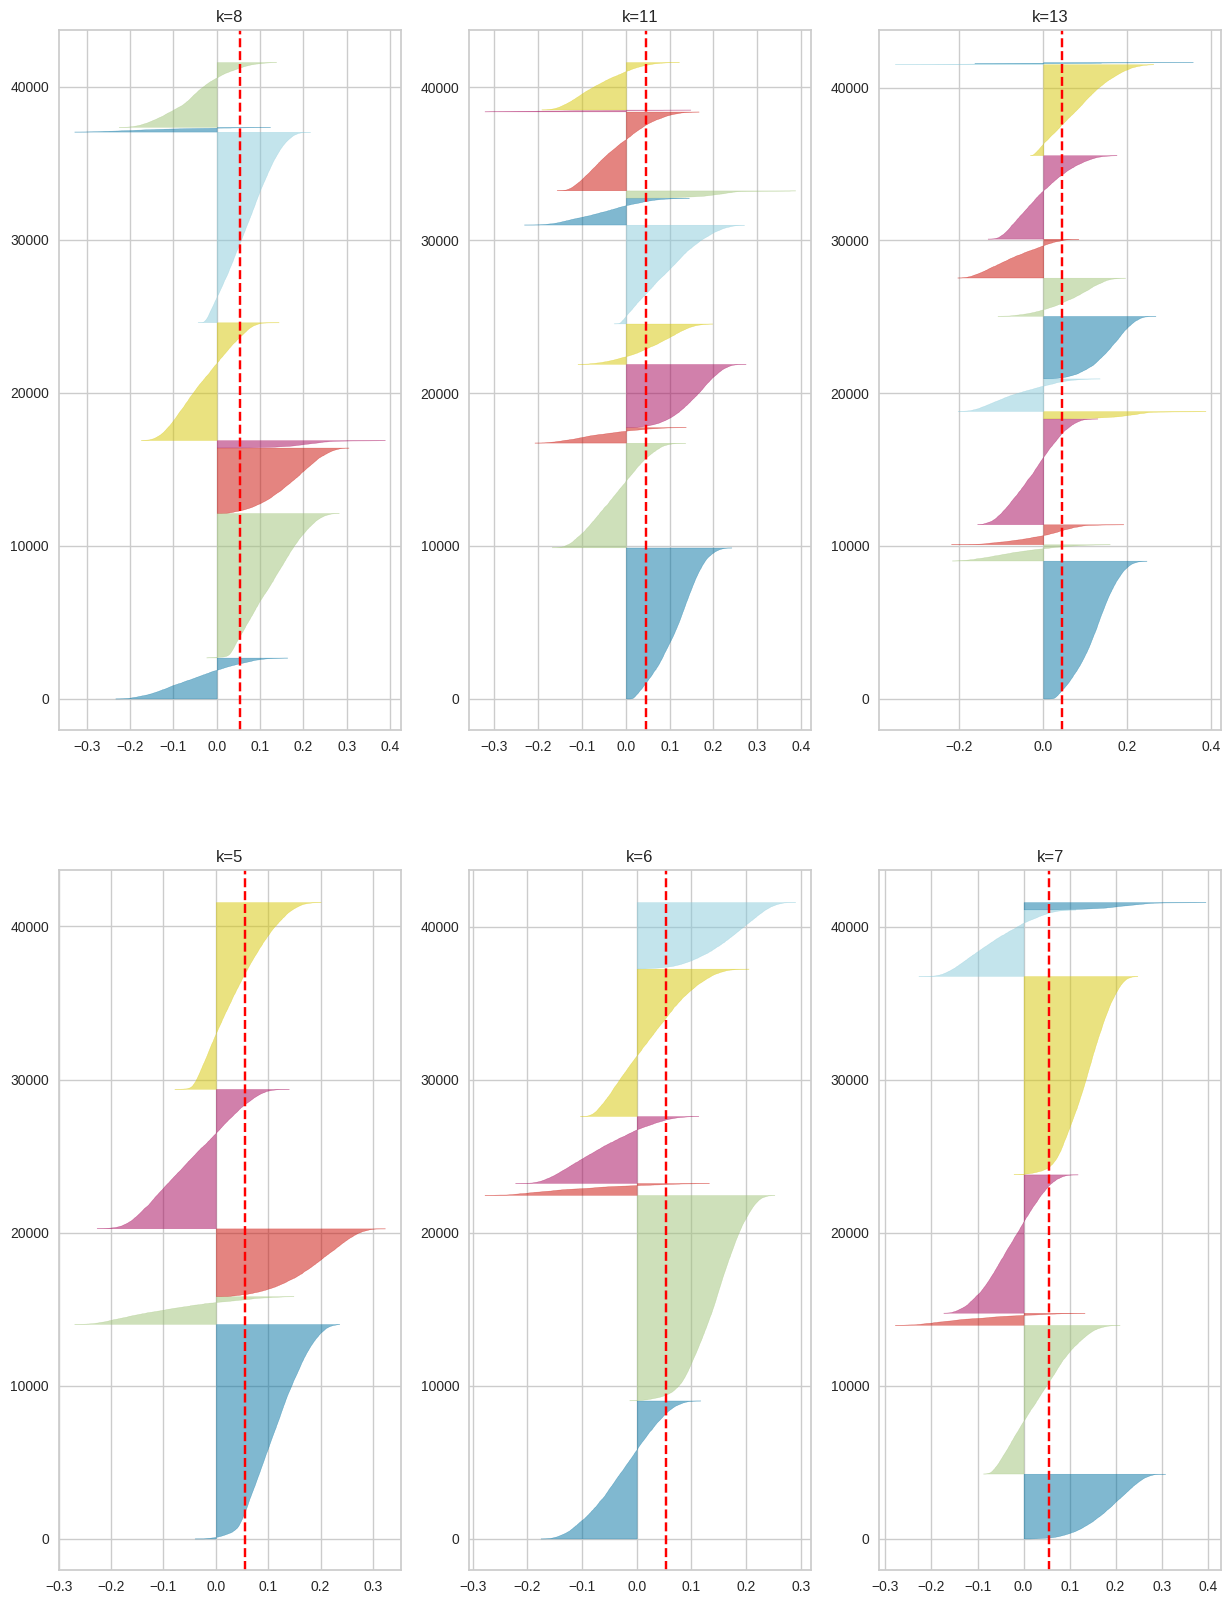

In [ ]:
# !pip install yellowbrick
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 3, figsize=(15,20))

'''
The graph above gives some promising k's.
'''
potential_k = [5,6,7,8,11,13]
for i in range(len(potential_k)):
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=potential_k[i], init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 3)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    axx= ax[q-1][mod]
    axx.set_title(f"k={potential_k[i]}")
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=axx)
    visualizer.fit(df_final[cols_final_pca])

## Gaussian Mixture Model

Now we compare our clustering results with results from using a Gaussian Mixture Model.

The Gaussian Mixture Model was trained in a separate pynb in this link: https://colab.research.google.com/drive/1mm6T9oln3Za8EtQuJTQVJscwsAJOtyDf?usp=sharing

And here is the silhouette score graph for the Gaussian Mixture Model, here we can see that the silhouette scores reach negative numbers indicating worse clustering.

![cluster1.png](https://i.imgur.com/wRv5YfX.png)

The following code computes the Davies-Bouldin Score. A lower score means a better model. Our model is superior to the GMM clustering.

In [ ]:
from sklearn.metrics import davies_bouldin_score
db_score_optimal = davies_bouldin_score(df_final[cols_final], clusters[optimal_k])
print(f"Kmeans (7 clusters) Davies-Bouldin Score: {db_score_optimal}")

Kmeans (7 clusters) Davies-Bouldin Score: 2.5530681376676845


![''](https://i.imgur.com/BdJU0jY.png)

The following scatter plot depicts the clusters from GMM clustering. The team has observed that even with 3, 5, or 7 clusters, the points do not have a definitive cluster.

![''](https://i.imgur.com/kmG6Kxl.png)

## Text Summary of Clusters

Here we can see the prevailing characteristics of each cluster in text form. In particular, we can see that cluster 4 and 5 show the highest class and the lowest class among the clusters in terms of household income.

In [ ]:
transfer_data = {
    "num_features": num_features,
    "cat_features": cat_features,
    "cols_to_use": cols_final,
    "cols_to_use_pca": cols_final_pca,
    "scaler": scaler,
    "pca": pca,
    "target_encoder": target_encoder,
    "models": models,
    "clusters": clusters
}

import pickle
# Transfer data to pickle file
with open('transfer_data.pkl', 'wb') as file:
    pickle.dump(transfer_data, file)

In [ ]:
# Transfer df to pickle file
with open('transfer_df.pkl', 'wb') as file:
    pickle.dump(df_final, file)

In [ ]:
import numpy as np
class HouseholdClustering():
  def __init__(self, k):
    self.df = df_final
    self.cols = transfer_data['cols_to_use']

    self.k = k
    self.cluster_assignments = clusters[k]
    default_center = [self.df[col].mean() for col in self.cols]
    self.default_center = pd.DataFrame([default_center], columns=self.cols)

  def summarize_cluster(self, i):
    print(f"Cluster {i}")
    print(f'Number of households: {len(self.df[self.cluster_assignments == i-1])}')
    self.describe_income(i)
    self.describe_region(i)
    self.describe_expenditure(i)
    self.describe_household_head(i)
    self.describe_housedold_family(i)
    self.describe_household_building(i)
    self.describe_household_utilities(i)
    self.describe_properties(i)
    print("\n\n")

  def describe_income(self, i):
    cluster_members = self.df[self.cluster_assignments == i-1]
    average_income = np.mean(cluster_members['total_household_income'])
    median_income = np.median(cluster_members['total_household_income'])
    income_std = np.std(cluster_members['total_household_income'])
    income_lower = average_income - income_std
    income_upper = average_income + income_std
    income_min = np.min(cluster_members['total_household_income'])
    income_max = np.max(cluster_members['total_household_income'])

    print('----------INCOME-----------')
    print(f"- average income: {self.num_to_pesos(average_income)}")
    print(f"- median income: {self.num_to_pesos(median_income)}")
    print(f"- standard deviation: {self.num_to_pesos(income_std)}")
    print(f"- range (within 1 std): {self.num_to_pesos(income_lower)} - {self.num_to_pesos(income_upper)}")
    print(f"- range (full): {self.num_to_pesos(income_min)} - {self.num_to_pesos(income_max)}")
    print(f"- coefficient of variation: {income_std / average_income}")
    print("--------END INCOME---------")

  def describe_region(self, i):
    print('----------REGION-----------')
    total = len(self.df[self.cluster_assignments == i-1])
    df = self.df[self.cluster_assignments==i-1]
    df = df['region'].value_counts(sort=True)
    print(df[:3].map(arg=lambda x: f'{round(x*100/total,2)}%'))
    print("--------END REGION---------")

  def describe_expenditure(self, i):
    expenditure_cols = ['total_food_expenditure', 'bread_and_cereals_expenditure', 'total_rice_expenditure',
       'meat_expenditure', 'total_fish_and_marine_products_expenditure',
       'fruit_expenditure', 'vegetables_expenditure',
       'restaurant_and_hotels_expenditure', 'alcoholic_beverages_expenditure',
       'tobacco_expenditure', 'clothing_footwear_and_other_wear_expenditure',
       'housing_and_water_expenditure', 'imputed_house_rental_value',
       'medical_care_expenditure', 'transportation_expenditure',
       'communication_expenditure', 'education_expenditure',
       'miscellaneous_goods_and_services_expenditure',
       'special_occasions_expenditure', 'crop_farming_and_gardening_expenses',]
    df_cluster_members = self.df[self.cluster_assignments == i-1]
    median_expenditure = [np.median(df_cluster_members[expd_col]) for expd_col in expenditure_cols[1:]]
    mean_expenditure = [np.mean(df_cluster_members[expd_col]) for expd_col in expenditure_cols[1:]]
    col_median = list(zip(expenditure_cols[1:], median_expenditure))
    col_median = sorted(col_median, key=lambda x: x[1], reverse=True)

    print('--------EXPENDITURE--------')
    print(f"Median Food Expenditure = {self.num_to_pesos(np.median(df_cluster_members['total_food_expenditure']))}")
    print('Top Expenses:')
    for i in range(5):
      print(f'{col_median[i][0]} = {self.num_to_pesos(col_median[i][1])}')
    print('------END EXPENDITURE------')

  def describe_household_head(self, i):
    total = len(self.df[self.cluster_assignments == i-1])
    df_cluster_members = self.df[self.cluster_assignments == i-1]
    df_male_female = df_cluster_members['household_head_sex'].value_counts(sort=True)
    df_marital_status = df_cluster_members['household_head_marital_status'].value_counts(sort=True)
    df_job_indicator = df_cluster_members['household_head_job_or_business_indicator'].value_counts(sort=True)
    print('------HOUSEHOLD HEAD-------')
    print(self.summarize_column(df_male_female, "Sex"))
    print(f"Median Age: {np.median(df_cluster_members['household_head_age'])}")
    print(self.summarize_column(df_marital_status, "Marital Status"))
    print(self.summarize_column(df_job_indicator, "Job or Business Indicator"))
    print('----END HOUSEHOLD HEAD-----')

  def describe_housedold_family(self, i):
    df_cluster_members = self.df[self.cluster_assignments == i-1]
    df_household_type = df_cluster_members['type_of_household'].value_counts(sort=True)
    print('-----HOUSEHOLD FAMILY------')
    print(self.summarize_column(df_household_type, "Type of Household"))
    print(f"Median Number of Members: {np.median(df_cluster_members['total_number_of_family_members'])}")
    print(f"Median Number of Members with Age < 5 years: {np.median(df_cluster_members['members_with_age_less_than_5_year_old'])}")
    print(f"Median Number of Members 5-17 years old: {np.median(df_cluster_members['members_with_age_5_17_years_old'])}")
    print(f"Median Number of Employed Members: {np.median(df_cluster_members['total_number_of_family_members_employed'])}")
    print('---END HOUSEHOLD FAMILY----')

  def describe_household_building(self, i):
    df_cluster_members = self.df[self.cluster_assignments == i-1]
    df_household_building = df_cluster_members['type_of_building_house'].value_counts(sort=True)
    df_roof = df_cluster_members['type_of_roof'].value_counts(sort=True)
    df_walls = df_cluster_members['type_of_walls'].value_counts(sort=True)
    df_tenure = df_cluster_members['tenure_status'].value_counts(sort=True)
    print('-----HOUSEHOLD BUILDING----')
    print(self.summarize_column(df_household_building, "Type of Building"))
    print(self.summarize_column(df_roof, "Type of Roof"))
    print(self.summarize_column(df_walls, "Type of Walls"))
    print(self.summarize_column(df_tenure, "Tenure Status"))
    print(f"Median House Floor Area: {np.median(df_cluster_members['house_floor_area'])}")
    print(f"Median House Age: {np.median(df_cluster_members['house_age'])}")
    print(f"Median Number of Bedrooms: {np.median(df_cluster_members['number_of_bedrooms'])}")
    print('---END HOUSEHOLD BUILDING--')

  def describe_household_utilities(self, i):
    df_cluster_members = self.df[self.cluster_assignments == i-1]
    df_toilet = df_cluster_members['toilet_facilities'].value_counts(sort=True)
    df_water = df_cluster_members['main_source_of_water_supply'].value_counts(sort=True)
    df_electricity = df_cluster_members['electricity'].value_counts(sort=True)
    df_electricity.index = ["Electricity" if item==1 else "No Electricity" for item in df_electricity.index]
    print('----HOUSEHOLD UTILITIES----')
    print(self.summarize_column(df_toilet, "Toilet Facilities"))
    print(self.summarize_column(df_electricity, "Electricity"))
    print(self.summarize_column(df_water, "Water Supply"))
    print('--END HOUSEHOLD UTILITIES--')

  def describe_properties(self, i):
    pass


  def summarize_column(self, series, col_name, max_kinds=3):
    total = sum(series)
    series_percents = [f"{round(series.loc[index]*100/total,2)}%" for index in series.index]
    series_message = f"{col_name} ({len(series.index)}): "
    kinds_to_display = min(max_kinds, len(series.index))
    for i in range(kinds_to_display):
      series_message += f"{series_percents[i]} are {series.index[i]}"
      if i!=kinds_to_display-1: series_message += ", "
    return series_message

  def num_to_pesos(self, num):
      return '₱{:,.2f}'.format(num)



cluttering = HouseholdClustering(optimal_k)
for i in range(optimal_k):
  cluttering.summarize_cluster(i+1)


Cluster 1
Number of households: 4377
----------INCOME-----------
- average income: ₱603,535.44
- median income: ₱551,865.00
- standard deviation: ₱245,981.41
- range (within 1 std): ₱357,554.04 - ₱849,516.85
- range (full): ₱58,958.00 - ₱3,294,322.00
- coefficient of variation: 0.40756745932281385
--------END INCOME---------
----------REGION-----------
NCR                    21.54%
IVA - CALABARZON       16.24%
III - Central Luzon    10.85%
Name: region, dtype: object
--------END REGION---------
--------EXPENDITURE--------
Median Food Expenditure = ₱154,787.00
Top Expenses:
housing_and_water_expenditure = ₱80,172.00
imputed_house_rental_value = ₱42,000.00
restaurant_and_hotels_expenditure = ₱33,100.00
bread_and_cereals_expenditure = ₱31,859.00
miscellaneous_goods_and_services_expenditure = ₱29,388.00
------END EXPENDITURE------
------HOUSEHOLD HEAD-------
Sex (2): 73.66% are Male, 26.34% are Female
Median Age: 53.0
Marital Status (5): 79.19% are Married, 14.99% are Widowed, 3.27% are S

In [ ]:
whole_dataset = HouseholdClustering(1)
whole_dataset.summarize_cluster(1)

Cluster 1
Number of households: 41544
----------INCOME-----------
- average income: ₱247,555.58
- median income: ₱164,079.50
- standard deviation: ₱286,877.07
- range (within 1 std): ₱-39,321.49 - ₱534,432.65
- range (full): ₱11,285.00 - ₱11,815,988.00
- coefficient of variation: 1.1588390144003342
--------END INCOME---------
----------REGION-----------
IVA - CALABARZON       10.02%
NCR                     9.94%
III - Central Luzon     7.79%
Name: region, dtype: object
--------END REGION---------
--------EXPENDITURE--------
Median Food Expenditure = ₱72,985.50
Top Expenses:
bread_and_cereals_expenditure = ₱23,324.00
housing_and_water_expenditure = ₱22,992.00
total_rice_expenditure = ₱16,620.00
imputed_house_rental_value = ₱10,800.00
total_fish_and_marine_products_expenditure = ₱8,695.00
------END EXPENDITURE------
------HOUSEHOLD HEAD-------
Sex (2): 78.19% are Male, 21.81% are Female
Median Age: 51.0
Marital Status (6): 75.45% are Married, 16.41% are Widowed, 4.67% are Single
Job or B

## Visual Summary of Clusters
The class below plot all boxplots for the numerical features of the dataset. The leftmost cluster, labeled 0, represents the entire dataset. The other clusters are from Kmeans.

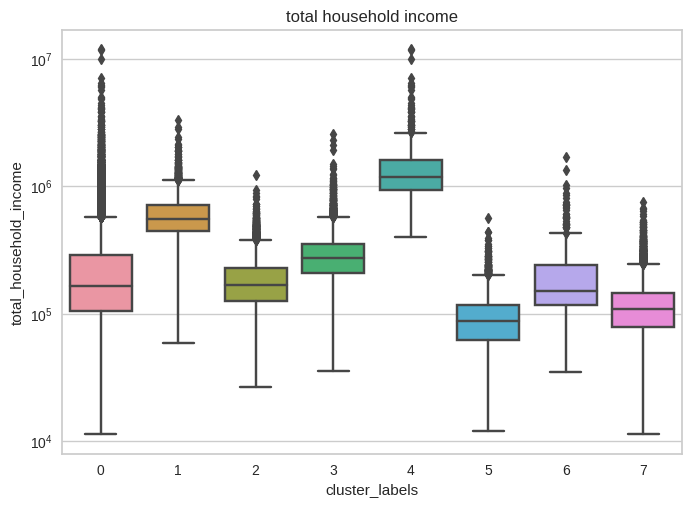

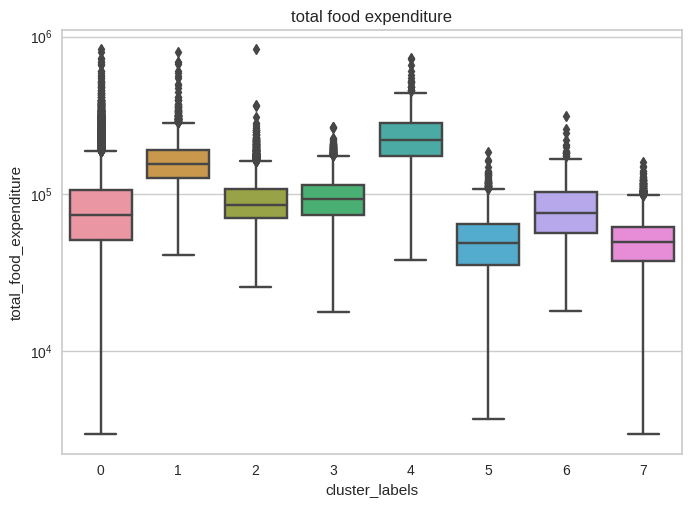

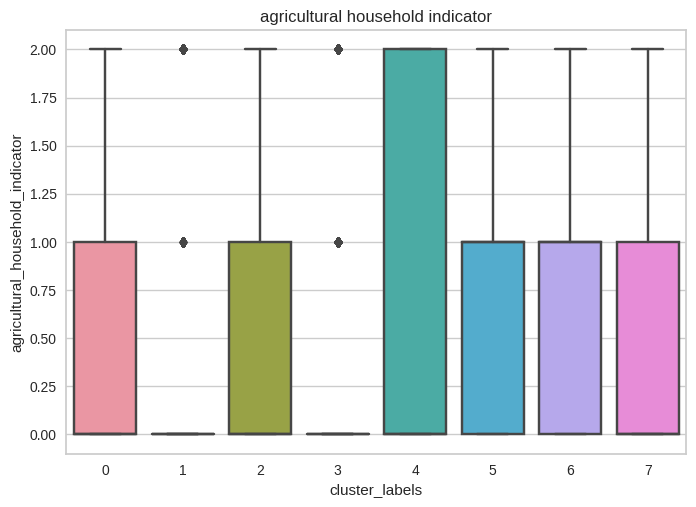

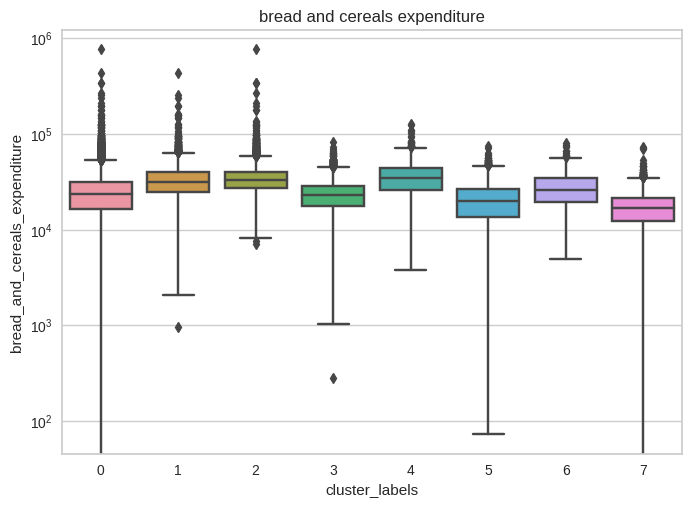

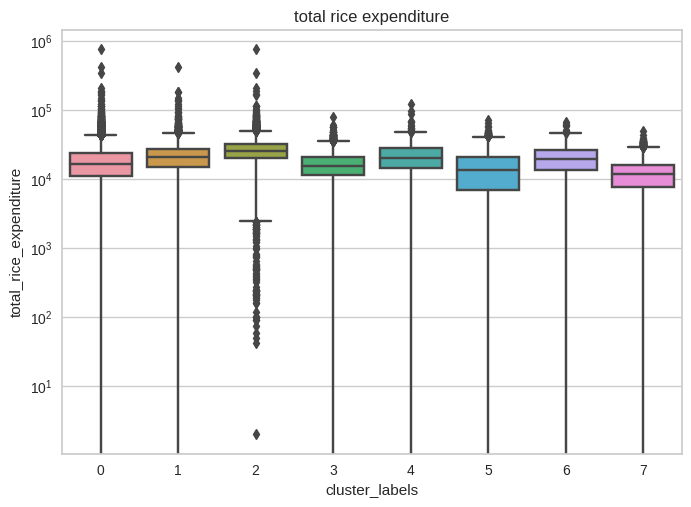

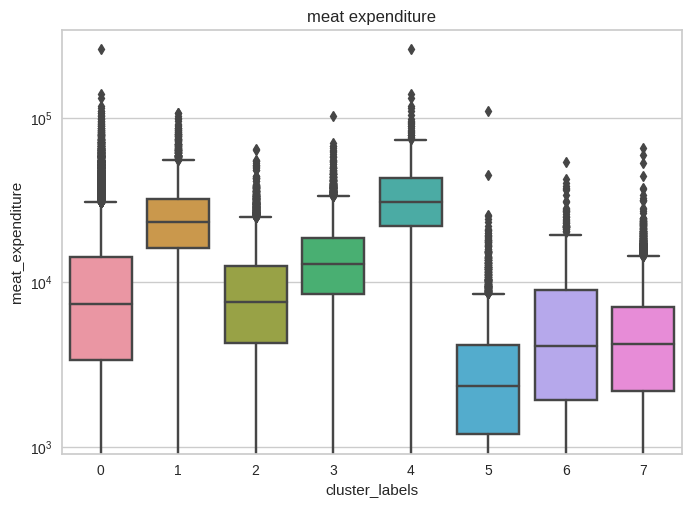

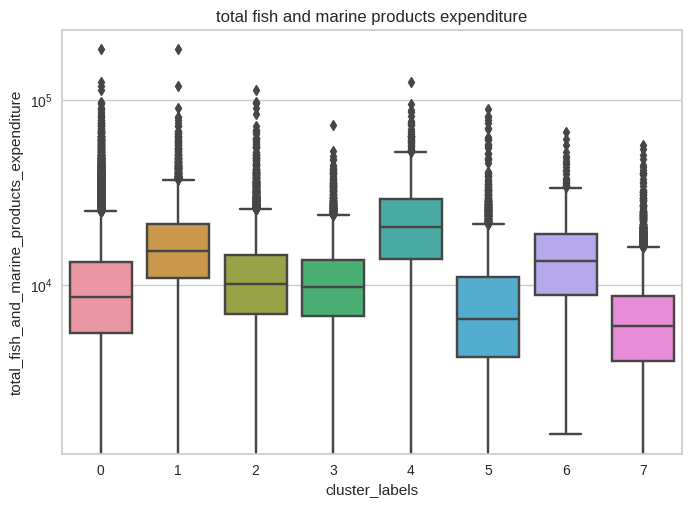

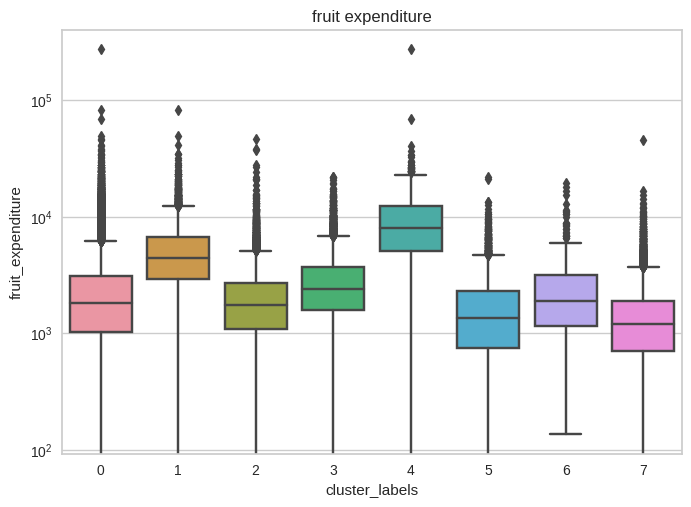

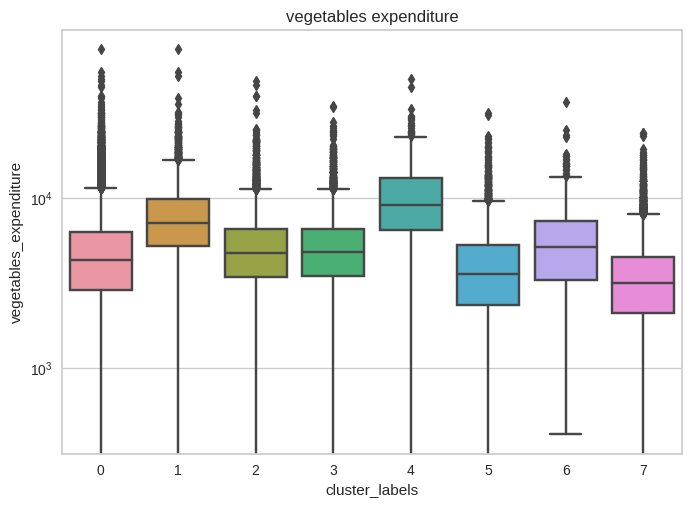

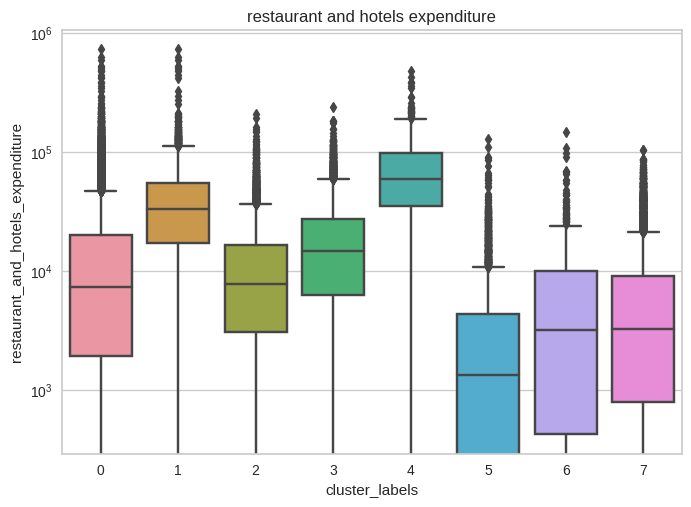

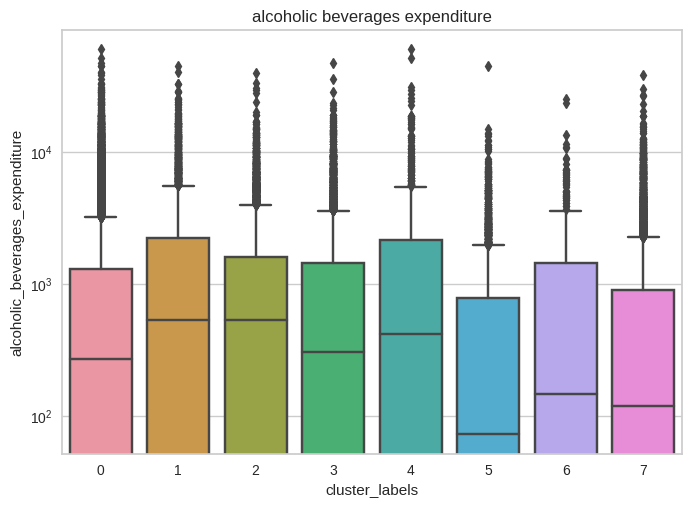

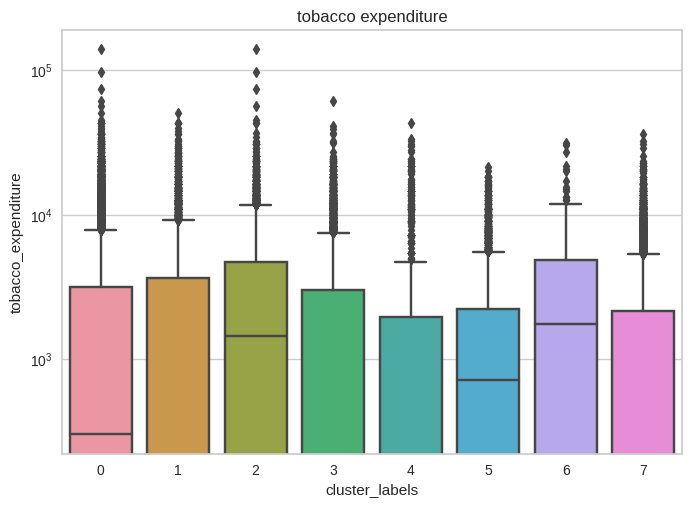

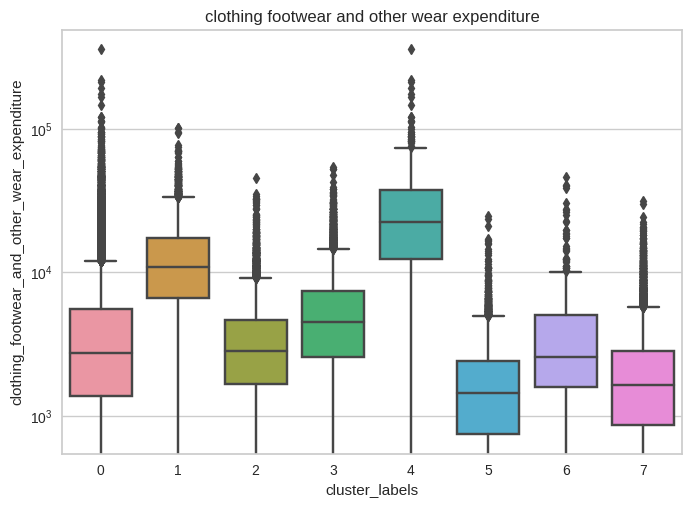

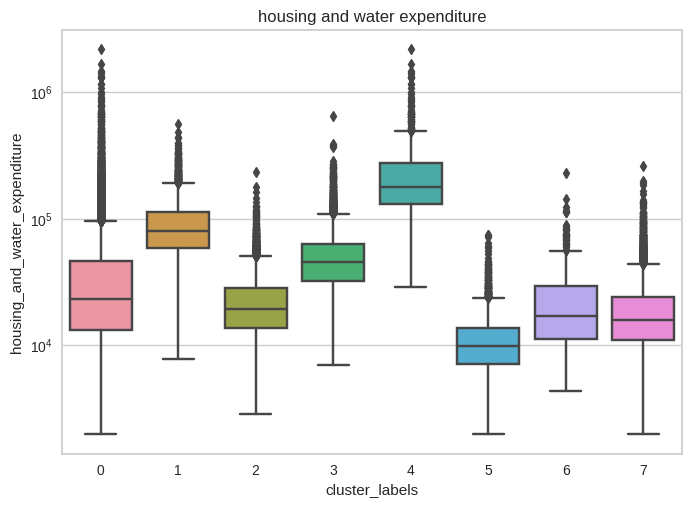

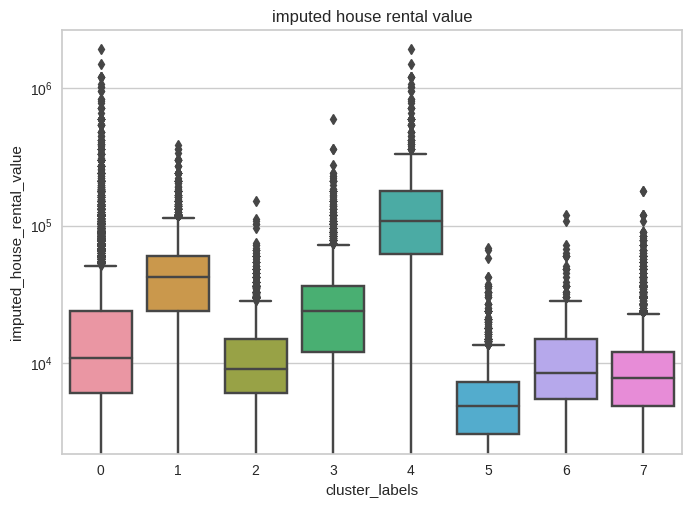

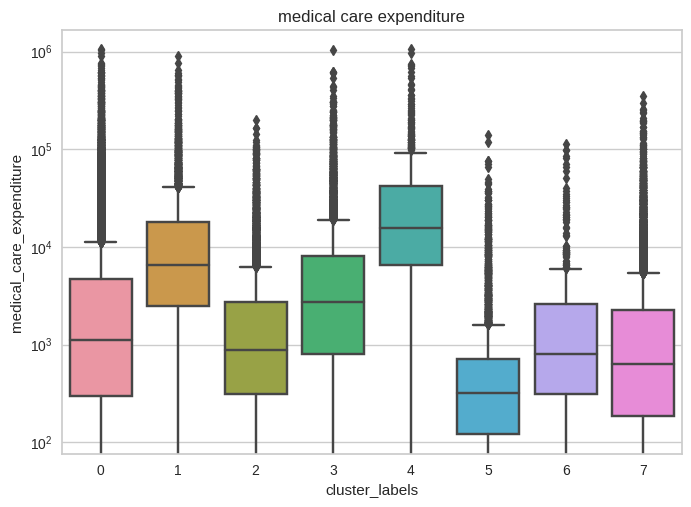

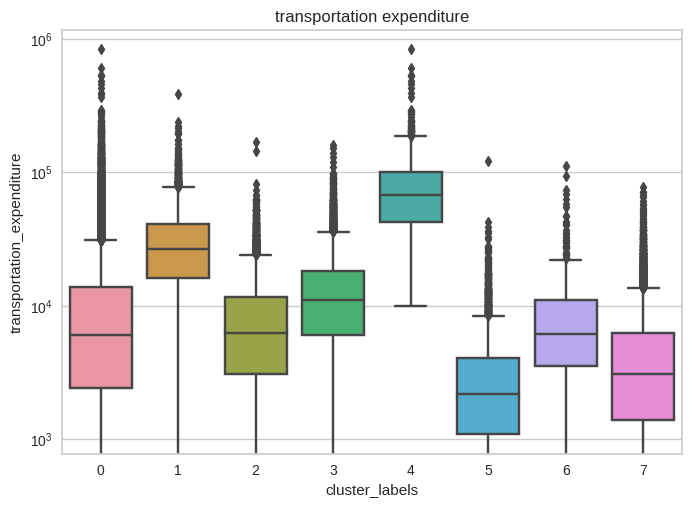

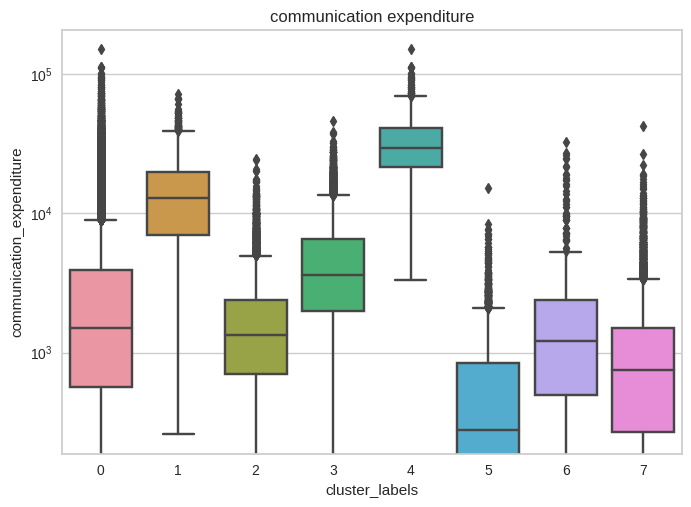

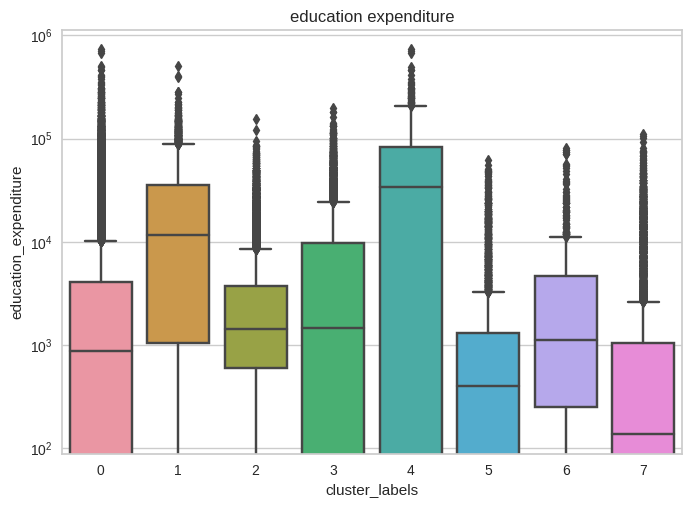

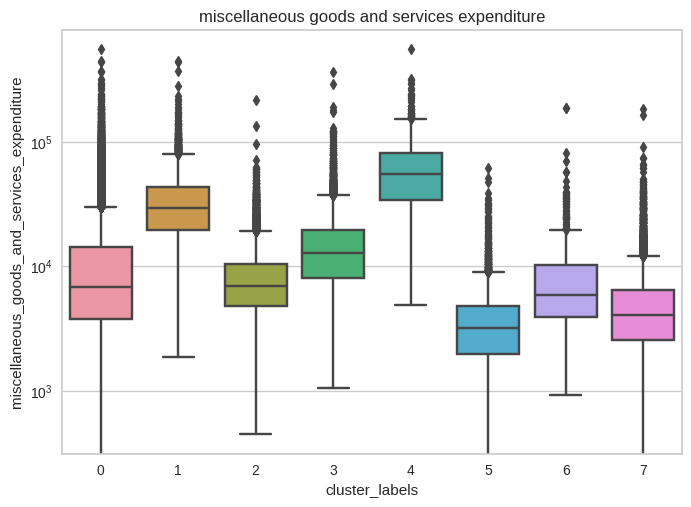

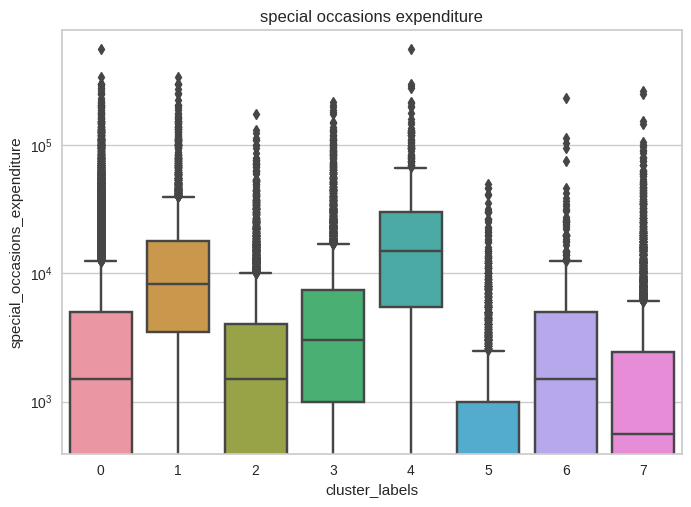

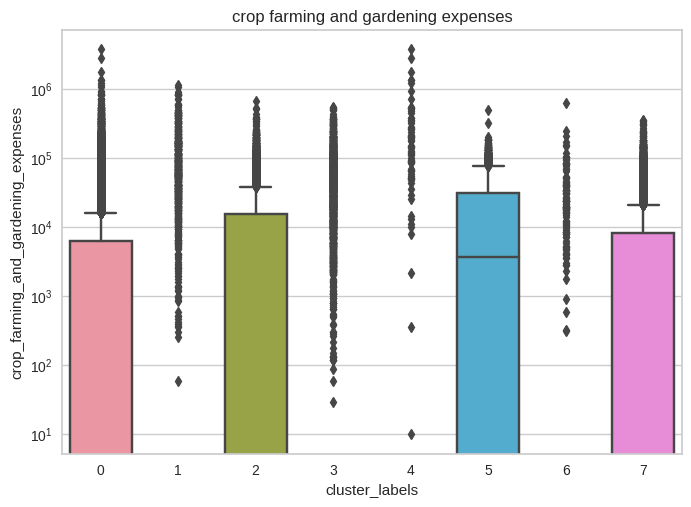

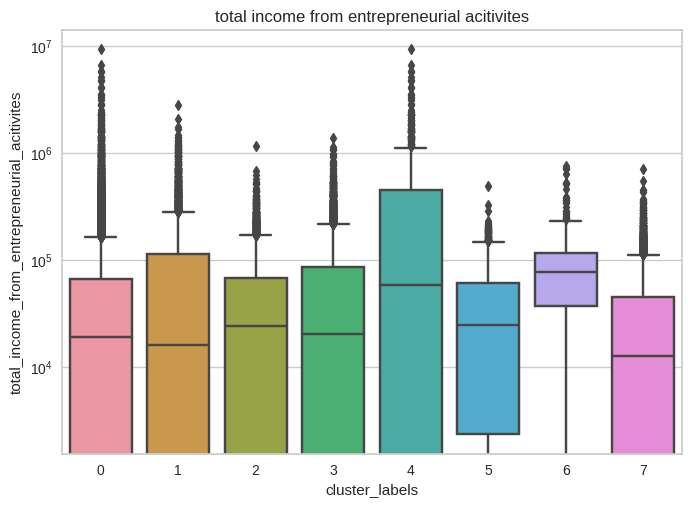

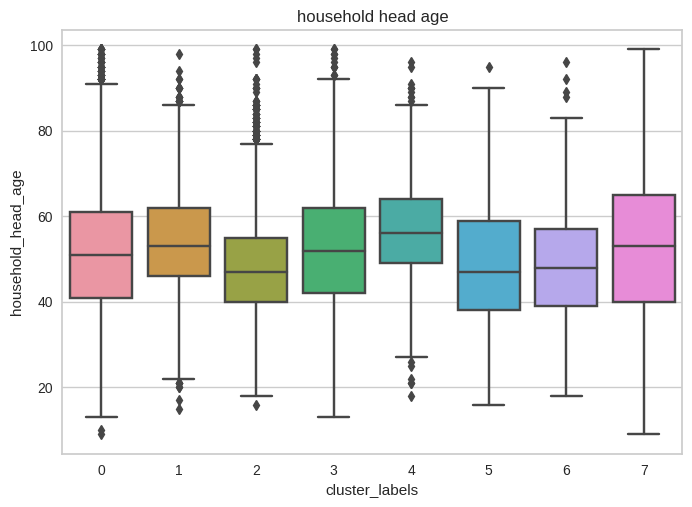

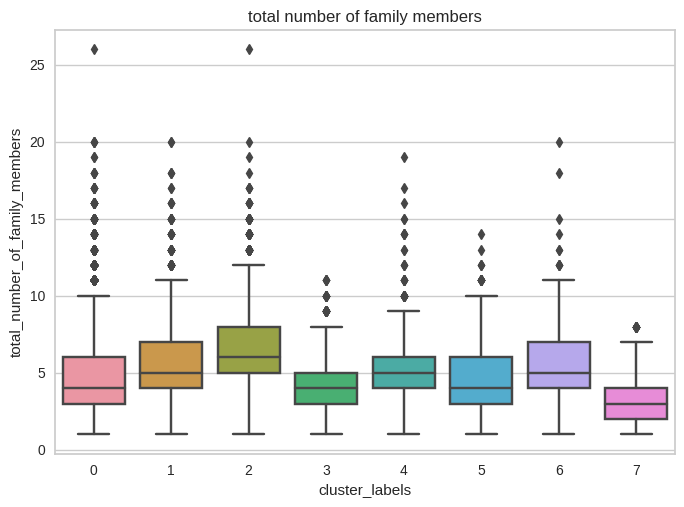

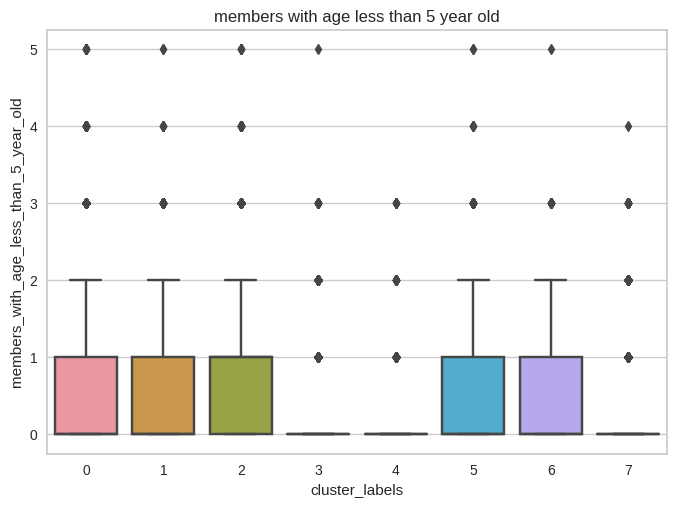

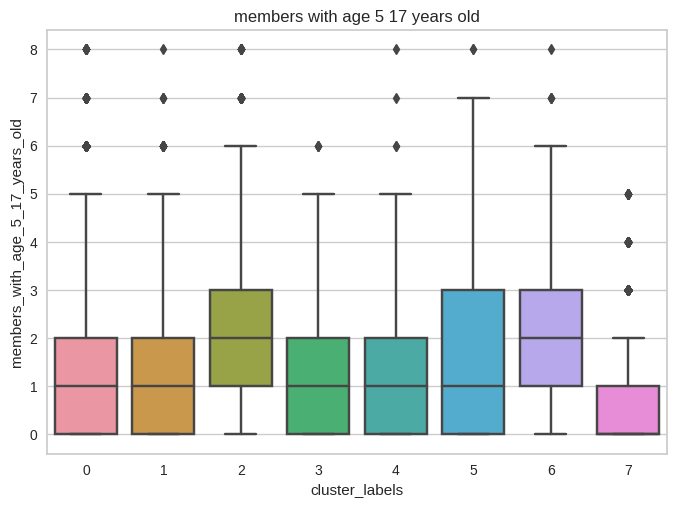

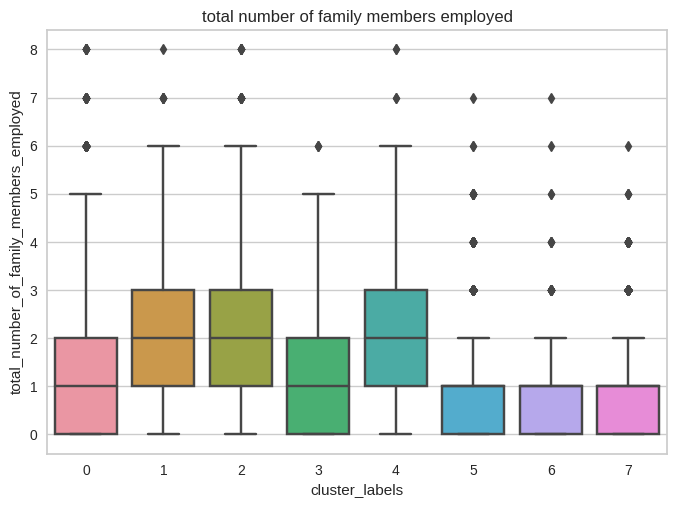

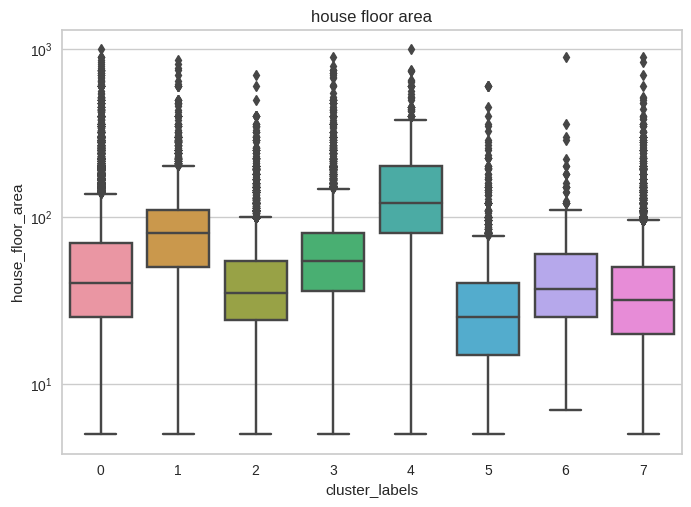

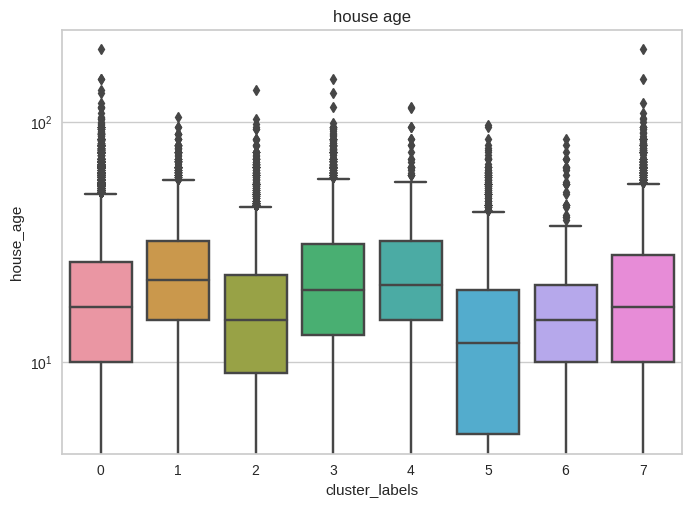

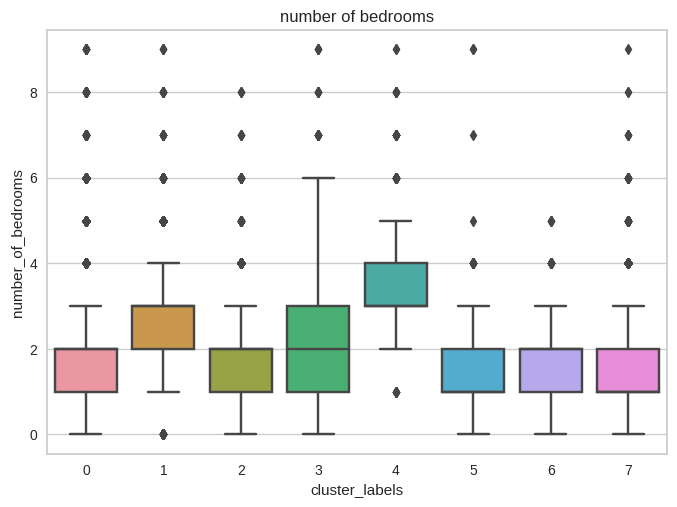

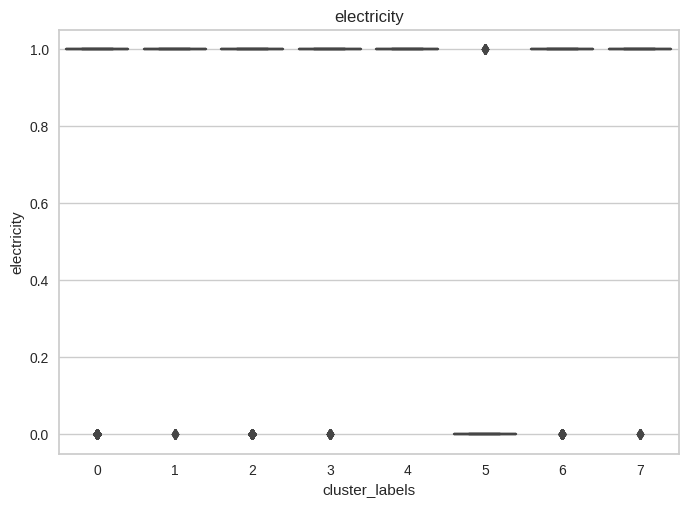

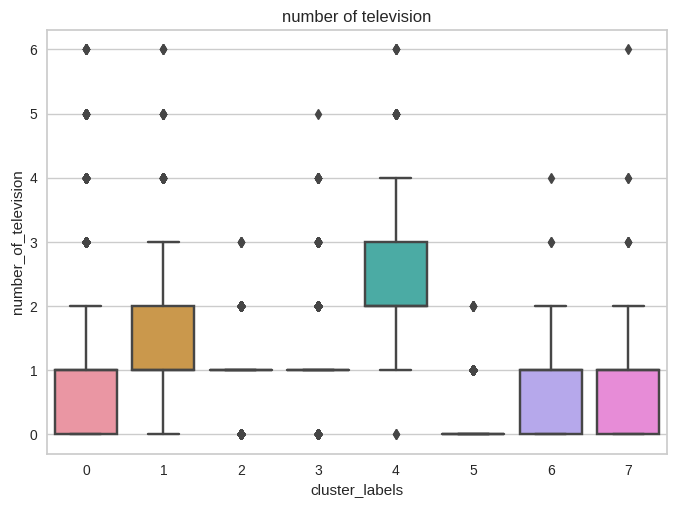

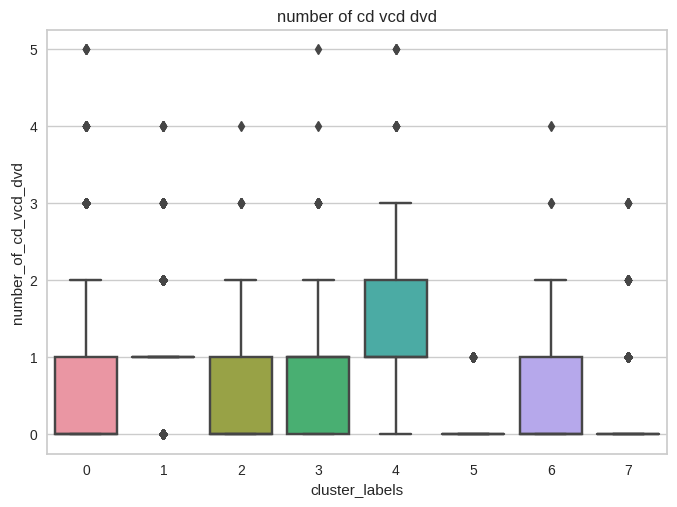

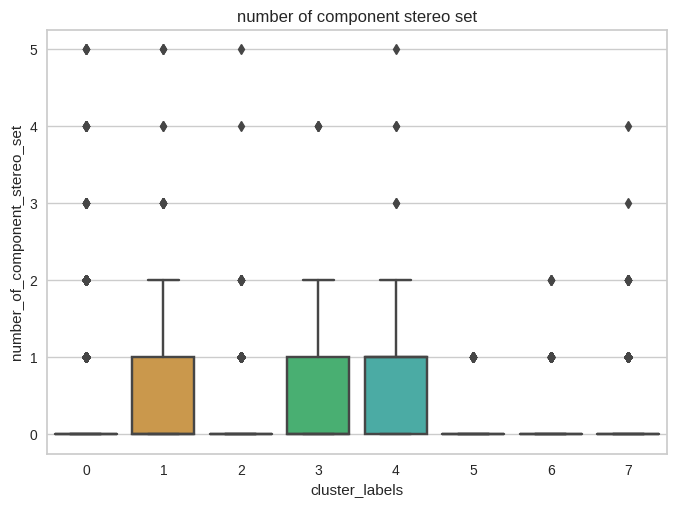

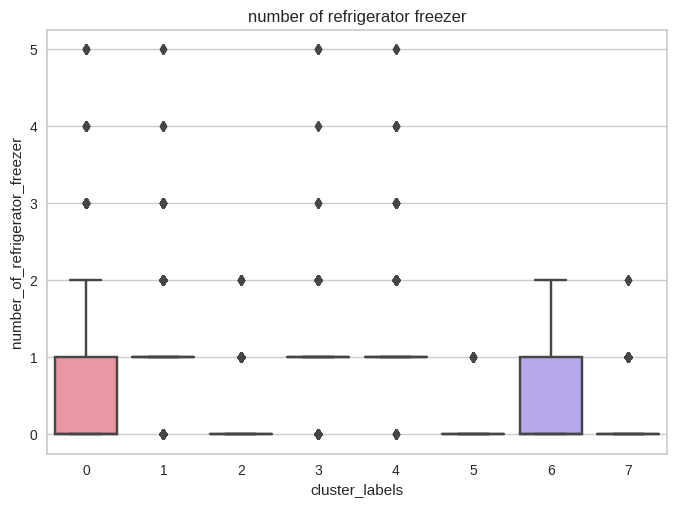

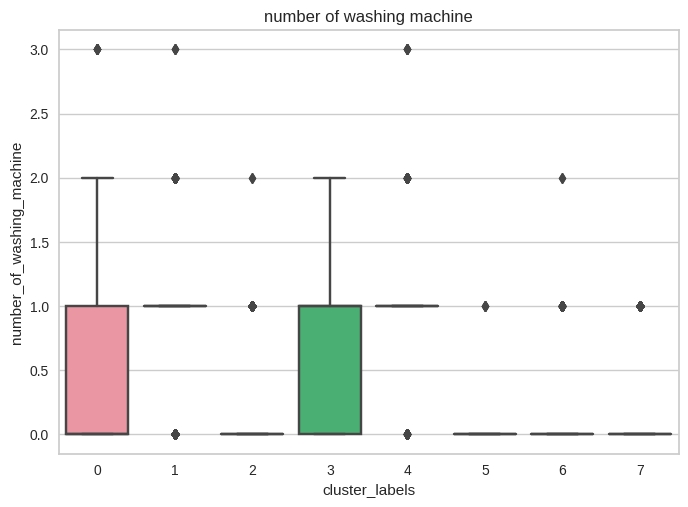

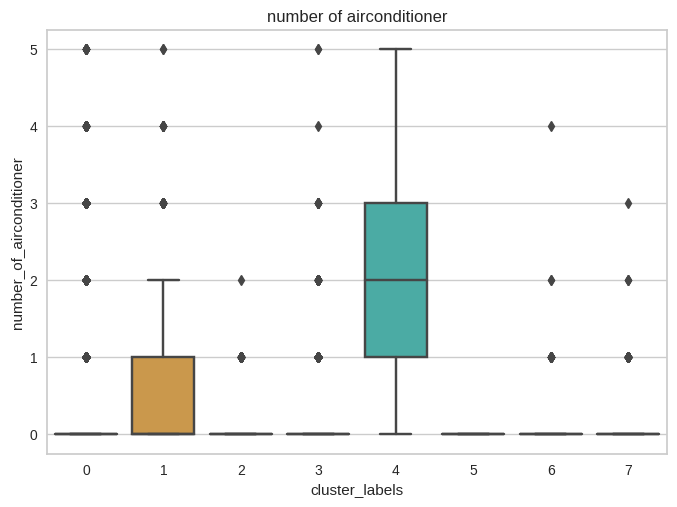

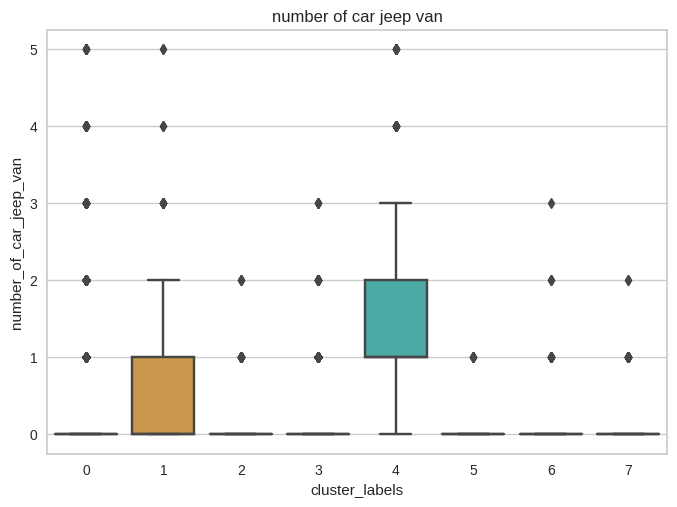

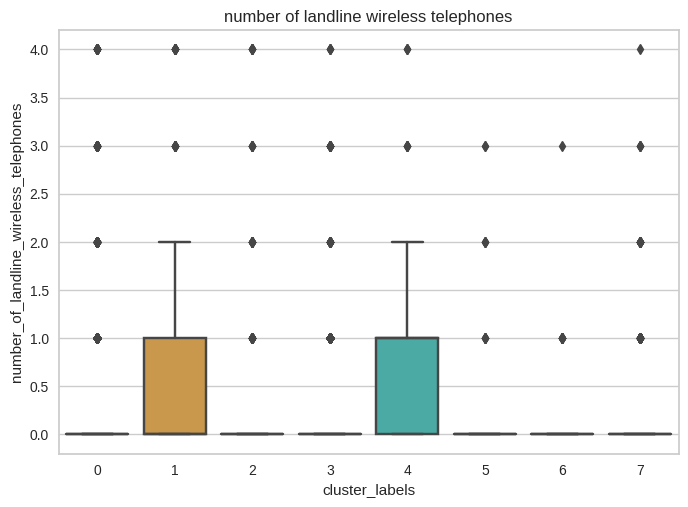

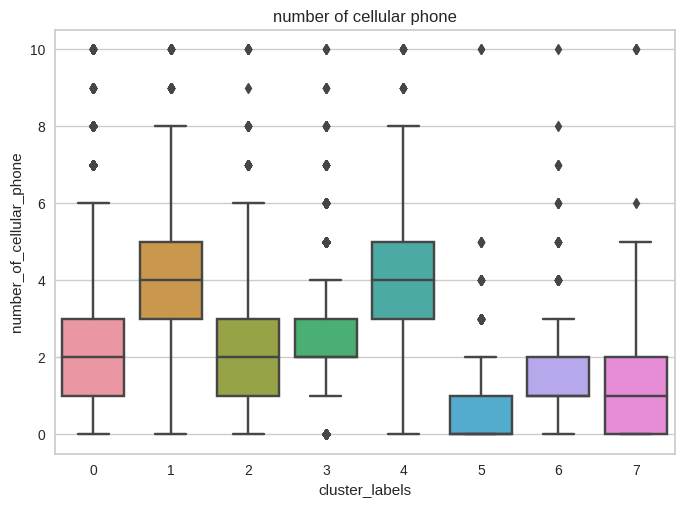

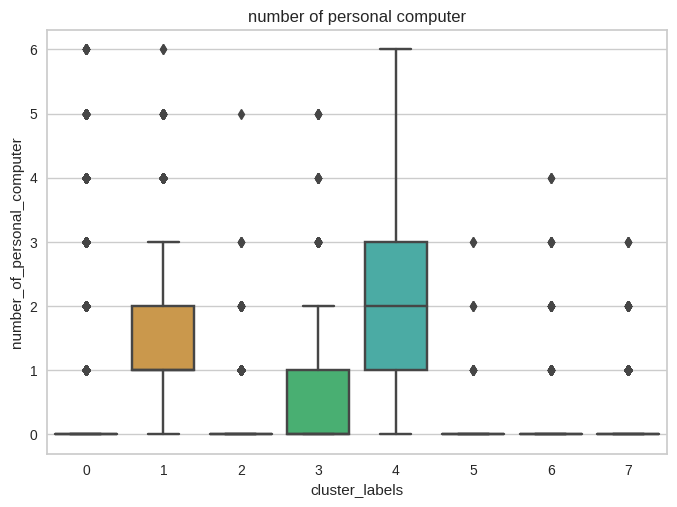

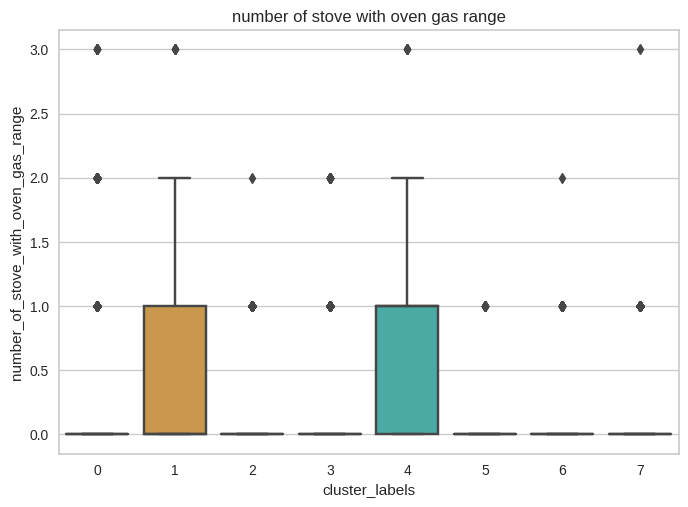

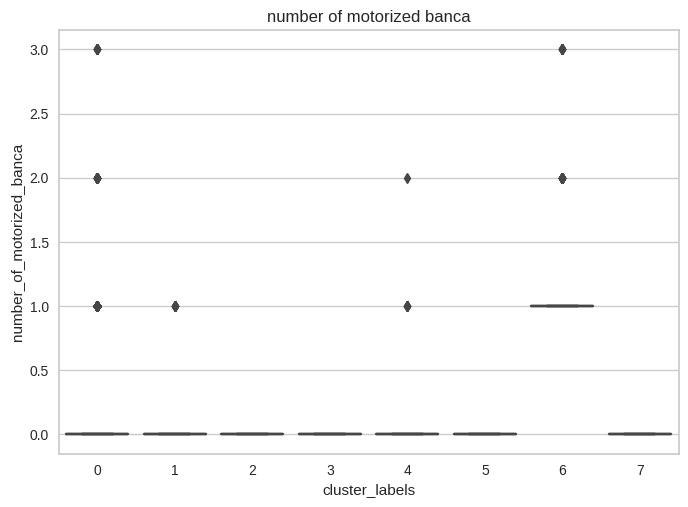

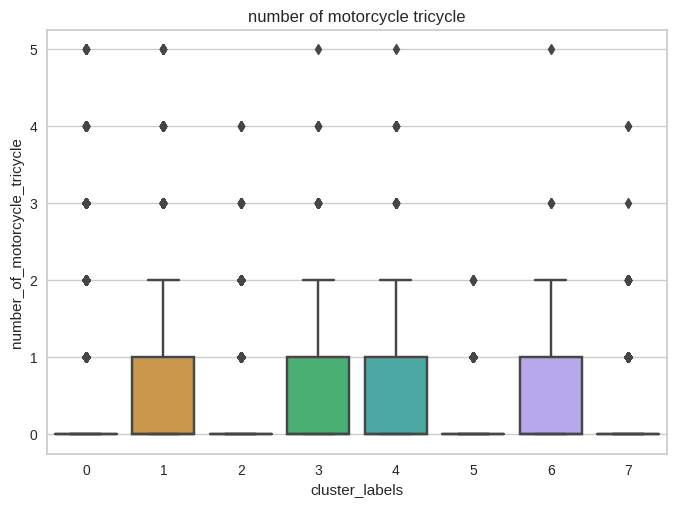

In [ ]:
import numpy as np
import seaborn as sns
import plotly.express as px
import copy

class ClusterComparison():
  def __init__(self, df_final, optimal_k):
    self.optimal_k = optimal_k
    self.model = models[optimal_k]
    self.df = df_final
    self.df['cluster_labels'] = self.model.labels_
    self.relevant_df = self.get_relevant_df()

  def get_relevant_df(self):
    relevant_df = copy.deepcopy(self.df)
    relevant_df['cluster_labels'] += 1
    df_copy = copy.deepcopy(self.df)
    df_copy['cluster_labels'] = 0
    relevant_df = pd.concat([relevant_df, df_copy])
    return relevant_df

  def plot_boxplot(self, col, log=False):
    relevant_df = self.df.loc[:, [col, 'cluster_labels']]
    relevant_df['cluster_labels'] += 1
    df_copy = copy.deepcopy(relevant_df)
    df_copy['cluster_labels'] = 0
    relevant_df = pd.concat([relevant_df, df_copy])

    sns.boxplot(data=relevant_df, y=col, x='cluster_labels')
    if log: plt.yscale('log')
    plt.title(" ".join(col.split("_")))
    plt.show()



log_cols = ['total_household_income', 'total_food_expenditure',
       'bread_and_cereals_expenditure', 'total_rice_expenditure',
       'meat_expenditure', 'total_fish_and_marine_products_expenditure',
       'fruit_expenditure', 'vegetables_expenditure',
       'restaurant_and_hotels_expenditure', 'alcoholic_beverages_expenditure',
       'tobacco_expenditure', 'clothing_footwear_and_other_wear_expenditure',
       'housing_and_water_expenditure', 'imputed_house_rental_value',
       'medical_care_expenditure', 'transportation_expenditure',
       'communication_expenditure', 'education_expenditure',
       'miscellaneous_goods_and_services_expenditure',
       'special_occasions_expenditure', 'crop_farming_and_gardening_expenses',
       'total_income_from_entrepreneurial_acitivites', 'house_floor_area', 'house_age']

compare = ClusterComparison(df_final, optimal_k)
for col in num_features:
  compare.plot_boxplot(col, col in log_cols)


# Prediction

Here we created an object for predicting the cluster of data of a given sample household. This can be seen in action in the prediction functionality in our web application.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import copy

class ClusterPredictor():
  def __init__(self, best_k):

    self.num_features = transfer_data['num_features']
    self.cat_features = transfer_data['cat_features']
    self.df_final = copy.deepcopy(df_final)
    self.cols_to_use = transfer_data['cols_to_use']
    self.cols_to_use_pca = transfer_data['cols_to_use_pca']

    self.best_k = best_k
    self.model = transfer_data['models'][best_k]
    self.scaler = transfer_data['scaler']
    self.target_encoder = transfer_data['target_encoder']
    self.pca = transfer_data['pca']
    default_center = [np.mean(self.df_final[col]) for col in self.df_final if col != 'region' and col not in self.cat_features]
    self.default_center = pd.DataFrame([default_center], columns=[col for col in self.df_final.columns if col != 'region' and col not in self.cat_features])

  def get_df_sample(self, website_data):

    # Helper function
    def underscore_formatter(words):
      import string
      words = str(words)
      for punct in string.punctuation:
        words=words.replace(punct, " ")
      spaces = [' '*i for i in range(10,1,-1)]
      words = words.lower().strip()
      for space in spaces:
        words=words.replace(space, ' ')
      return '_'.join(words.split(' '))

    df_sample = pd.DataFrame([website_data])

    # Use data from displayed value instead of slider
    display_cols = []
    for col in df_sample.columns:
      if '-display' in col:
        df_sample[col.replace('-display','')] = df_sample[col]
        display_cols.append(col)

    if len(display_cols)>0: df_sample = df_sample.drop(columns = display_cols)
    df_sample.columns = [underscore_formatter(col) for col in df_sample.columns]
    df_sample.replace({'electricity': {'Has electricity': 1, 'No electricity': 0}}, inplace=True)

    # Fill out missing numerical columns
    missing_cols = [col for col in self.df_final[self.num_features].columns if col not in df_sample.columns]
    missing_cols_values = [self.default_center.at[0, col] for col in missing_cols]
    df_missing_cols = pd.DataFrame([missing_cols_values], columns=missing_cols)
    df_sample = df_sample.join(df_missing_cols)

    to_target_encode = ['region']
    # One-hot encoding on categorical features
    onehot_encoder = OneHotEncoder(sparse_output=False)
    df_onehot_encoded = pd.DataFrame(onehot_encoder.fit_transform(df_sample[self.cat_features]))
    df_onehot_encoded.columns = [underscore_formatter(col) for col in onehot_encoder.get_feature_names_out(self.cat_features)]

    # Target encoding on 'region' feature
    df_target_encoded = pd.DataFrame(self.target_encoder.transform(df_sample[to_target_encode], df_sample['total_household_income']))

    # Standardize the numerical features and target encoded feature
    df_standardized = pd.concat([df_sample[self.num_features], df_target_encoded], axis=1)
    df_standardized = self.scaler.transform(df_standardized)
    df_standardized = pd.DataFrame(df_standardized, columns=self.num_features + df_target_encoded.columns.tolist())
    df_standardized.columns = [underscore_formatter(col) + '_final' for col in self.num_features + df_target_encoded.columns.tolist()]

    # Concatenate original dataframe, standardized dataframe, and the encoded dataframe
    df_clean = pd.concat([df_sample, df_standardized, df_onehot_encoded], axis=1)

    # Fill out the rest of the missing columns
    missing_cols = [col for col in self.df_final[self.cols_to_use].columns if col not in df_clean.columns]
    missing_cols_values = [self.default_center.at[0, col] for col in missing_cols]
    df_missing_cols = pd.DataFrame([missing_cols_values], columns=missing_cols)
    df_clean = df_clean.join(df_missing_cols)
    print(f'There are {len(missing_cols)} unsupplied columns filled with default value.')

    # Apply PCA
    df_clean_pca = self.pca.transform(df_clean[self.cols_to_use])
    df_clean_pca = pd.DataFrame(df_clean_pca, columns=self.cols_to_use_pca)

    return df_clean_pca

  def predict(self, website_data):
    df_sample = self.get_df_sample(website_data)
    return self.model.predict(df_sample)+1


In [ ]:
data_samples = [
    {'region': 'VIII - Eastern Visayas', 'main-source-of-income': 'Other sources of Income', 'household-head-sex': 'Male', 'household-head-age': '9', 'household-head-age-display': '9', 'household-head-marital-status': 'Single', 'household-head-class-of-worker': 'Worked for private household', 'household-head-job-or-business-indicator': 'No Job/Business', 'type-of-household': 'Extended Family', 'total-number-of-family-members': '9', 'total-number-of-family-members-display': '9', 'members-with-age-less-than-5-year-old': '1', 'members-with-age-less-than-5-year-old-display': '1', 'members-with-age-5-17-years-old': '4', 'members-with-age-5-17-years-old-display': '4', 'total-number-of-family-members-employed': '8', 'total-number-of-family-members-employed-display': '8', 'type-of-building-house': 'Duplex', 'type-of-roof': 'Mixed but predominantly light materials', 'type-of-walls': 'NOt applicable', 'tenure-status': 'Own house, rent-free lot with consent of owner', 'house-floor-area': '367', 'house-floor-area-display': '367', 'house-age': '79', 'house-age-display': '79', 'number-of-bedrooms': '0', 'number-of-bedrooms-display': '0', 'toilet-facilities': 'Water-sealed, sewer septic tank, shared with other household', 'main-source-of-water-supply': 'Peddler', 'electricity': 'No electricity', 'agricultural-household-indicator': '1', 'agricultural-household-indicator-display': '1', 'number-of-television': '6', 'number-of-television-display': '6', 'number-of-cd-vcd-dvd': '2', 'number-of-cd-vcd-dvd-display': '2', 'number-of-component-stereo-set': '2', 'number-of-component-stereo-set-display': '2', 'number-of-refrigerator-freezer': '3', 'number-of-refrigerator-freezer-display': '3', 'number-of-washing-machine': '10', 'number-of-washing-machine-display': '10', 'number-of-airconditioner': '1', 'number-of-airconditioner-display': '1', 'number-of-car-jeep-van': '1', 'number-of-car-jeep-van-display': '1', 'number-of-landline-wireless-telephones': '6', 'number-of-landline-wireless-telephones-display': '6', 'number-of-cellular-phone': '9', 'number-of-cellular-phone-display': '9', 'number-of-personal-computer': '0', 'number-of-personal-computer-display': '0', 'number-of-stove-with-oven-gas-range': '7', 'number-of-stove-with-oven-gas-range-display': '7', 'number-of-motorized-banca': '3', 'number-of-motorized-banca-display': '3', 'number-of-motorcycle-tricycle': '1', 'number-of-motorcycle-tricycle-display': '1', 'total-food-expenditure': '138684', 'total-food-expenditure-display': '138684', 'bread-and-cereals-expenditure': '198621', 'bread-and-cereals-expenditure-display': '198621', 'total-rice-expenditure': '90798', 'total-rice-expenditure-display': '90798', 'meat-expenditure': '101394', 'meat-expenditure-display': '101394', 'total-fish-and-marine-products-expenditure': '99977', 'total-fish-and-marine-products-expenditure-display': '99977', 'fruit-expenditure': '144032', 'fruit-expenditure-display': '144032', 'vegetables-expenditure': '73072', 'vegetables-expenditure-display': '73072', 'restaurant-and-hotels-expenditure': '186731', 'restaurant-and-hotels-expenditure-display': '186731', 'alcoholic-beverages-expenditure': '106535', 'alcoholic-beverages-expenditure-display': '106535', 'tobacco-expenditure': '10838', 'tobacco-expenditure-display': '10838', 'clothing-footwear-and-other-wear-expenditure': '186663', 'clothing-footwear-and-other-wear-expenditure-display': '186663', 'housing-and-water-expenditure': '183145', 'housing-and-water-expenditure-display': '183145', 'imputed-house-rental-value': '40431', 'imputed-house-rental-value-display': '40431', 'medical-care-expenditure': '124713', 'medical-care-expenditure-display': '124713', 'transportation-expenditure': '98177', 'transportation-expenditure-display': '98177', 'communication-expenditure': '115845', 'communication-expenditure-display': '115845', 'education-expenditure': '6707', 'education-expenditure-display': '6707', 'miscellaneous-goods-and-services-expenditure': '11817', 'miscellaneous-goods-and-services-expenditure-display': '11817', 'special-occasions-expenditure': '147798', 'special-occasions-expenditure-display': '147798', 'crop-farming-and-gardening-expenses': '15148', 'crop-farming-and-gardening-expenses-display': '15148'}
    , {'region': ' ARMM', 'total-household-income': '117510', 'total-household-income-display': '117510', 'total-income-from-entrepreneurial-acitivites': '1352662', 'total-income-from-entrepreneurial-acitivites-display': '1352662', 'main-source-of-income': 'Other sources of Income', 'household-head-sex': 'Female', 'household-head-age': '100', 'household-head-age-display': '100', 'household-head-marital-status': 'Divorced/Separated', 'household-head-class-of-worker': 'NaN', 'household-head-job-or-business-indicator': 'No Job/Business', 'type-of-household': 'Single Family', 'total-number-of-family-members': '5', 'total-number-of-family-members-display': '5', 'members-with-age-less-than-5-year-old': '8', 'members-with-age-less-than-5-year-old-display': '8', 'members-with-age-5-17-years-old': '4', 'members-with-age-5-17-years-old-display': '4', 'total-number-of-family-members-employed': '2', 'total-number-of-family-members-employed-display': '2', 'type-of-building-house': 'Commercial/industrial/agricultural building', 'type-of-roof': 'Salvaged/makeshift materials', 'type-of-walls': 'Very Light', 'tenure-status': 'Rent-free house and lot without consent of owner', 'house-floor-area': '407', 'house-floor-area-display': '407', 'house-age': '22', 'house-age-display': '22', 'number-of-bedrooms': '0', 'number-of-bedrooms-display': '0', 'toilet-facilities': 'Water-sealed, sewer septic tank, used exclusively by household', 'main-source-of-water-supply': 'Peddler', 'electricity': 'No electricity', 'agricultural-household-indicator': '1', 'agricultural-household-indicator-display': '1', 'number-of-television': '7', 'number-of-television-display': '7', 'number-of-cd-vcd-dvd': '7', 'number-of-cd-vcd-dvd-display': '7', 'number-of-component-stereo-set': '2', 'number-of-component-stereo-set-display': '2', 'number-of-refrigerator-freezer': '1', 'number-of-refrigerator-freezer-display': '1', 'number-of-washing-machine': '4', 'number-of-washing-machine-display': '4', 'number-of-airconditioner': '5', 'number-of-airconditioner-display': '5', 'number-of-car-jeep-van': '6', 'number-of-car-jeep-van-display': '6', 'number-of-landline-wireless-telephones': '5', 'number-of-landline-wireless-telephones-display': '5', 'number-of-cellular-phone': '6', 'number-of-cellular-phone-display': '6', 'number-of-personal-computer': '4', 'number-of-personal-computer-display': '4', 'number-of-stove-with-oven-gas-range': '0', 'number-of-stove-with-oven-gas-range-display': '0', 'number-of-motorized-banca': '10', 'number-of-motorized-banca-display': '10', 'number-of-motorcycle-tricycle': '5', 'number-of-motorcycle-tricycle-display': '5', 'total-food-expenditure': '57547', 'total-food-expenditure-display': '57547', 'bread-and-cereals-expenditure': '61948', 'bread-and-cereals-expenditure-display': '61948', 'total-rice-expenditure': '194031', 'total-rice-expenditure-display': '194031', 'meat-expenditure': '131197', 'meat-expenditure-display': '131197', 'total-fish-and-marine-products-expenditure': '181820', 'total-fish-and-marine-products-expenditure-display': '181820', 'fruit-expenditure': '125213', 'fruit-expenditure-display': '125213', 'vegetables-expenditure': '160003', 'vegetables-expenditure-display': '160003', 'restaurant-and-hotels-expenditure': '173743', 'restaurant-and-hotels-expenditure-display': '173743', 'alcoholic-beverages-expenditure': '83952', 'alcoholic-beverages-expenditure-display': '83952', 'tobacco-expenditure': '134857', 'tobacco-expenditure-display': '134857', 'clothing-footwear-and-other-wear-expenditure': '116946', 'clothing-footwear-and-other-wear-expenditure-display': '116946', 'housing-and-water-expenditure': '54528', 'housing-and-water-expenditure-display': '54528', 'imputed-house-rental-value': '60372', 'imputed-house-rental-value-display': '60372', 'medical-care-expenditure': '97308', 'medical-care-expenditure-display': '97308', 'transportation-expenditure': '29307', 'transportation-expenditure-display': '29307', 'communication-expenditure': '43270', 'communication-expenditure-display': '43270', 'education-expenditure': '68090', 'education-expenditure-display': '68090', 'miscellaneous-goods-and-services-expenditure': '73020', 'miscellaneous-goods-and-services-expenditure-display': '73020', 'special-occasions-expenditure': '139972', 'special-occasions-expenditure-display': '139972', 'crop-farming-and-gardening-expenses': '28499', 'crop-farming-and-gardening-expenses-display': '28499'}
]
cluster_predictor = ClusterPredictor(optimal_k)
for sample in data_samples:
  print(f"Household belongs to cluster {cluster_predictor.predict(sample)[0]}")

There are 58 unsupplied columns filled with default value.
Household belongs to cluster 4
There are 58 unsupplied columns filled with default value.
Household belongs to cluster 6


# 3D tSNE
Check it out in our web app. (The following runs for 40 mins.)

In [ ]:
# from matplotlib import pyplot as plt
# from sklearn.manifold import TSNE

# tsne_3d = TSNE(n_components=3, random_state=42)
# tsne_result_3d = tsne_3d.fit_transform(df_final[cols_final])

In [ ]:
# import plotly.express as px
# from sklearn.decomposition import PCA

# components = tsne_result_3d

# fig = px.scatter_3d(
#     components, x=0, y=1, z=2, color=models[7].labels_,
#     title=f'Total Explained Variance: 95%',
#     labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
# )
# fig.update_layout(autosize=False,width=800,height=800,)
# fig.show()